# Breast Cancer Prediction Capstone Project

Breast cancer is one of the most common cancers in women globally, accounting for the majority of new cancer cases and 
cancer-related deaths according to global statistics, making it a major public health problem in the world.

Early diagnosis of breast cancer can dramatically improve prognosis and chances of survival, as it can promote timely clinical treatment of patients.more precise classification of benign tumours can prevent patients from undergoing unnecessary treatments.

So, In this project we are going to make prediction to breast cancer using scikit-learn classification models and calulate the accuracy of the model. The dataset for the breast cancer was imported from the scikit-learn package.


* Let’s start by importing and loading the necessary python libraries and the breast cancer dataset provided by Scikit-learn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset from sklearn and getting the dataset

import sklearn.datasets as data
breast_cancer = data.load_breast_cancer()
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Now, we need to create new variables for each important set of information that we find useful and assign the attributes in the dataset to those variables.
So, let us divide the features in X and target in Y.

In [3]:
# features data
X=breast_cancer.data
# target data
Y=breast_cancer.target

In [4]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [5]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
# checking the shape of the data
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


the X has 30 columns i.e. 30 features and Y has 1 column in which two values bengin and malignant and both has 569 rows

**Import data to  Pandas data Frame**


In [7]:
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [8]:
# adding target column
df['class']=breast_cancer.target

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
# statistical analysis
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
# counting the values in the target column class
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [12]:
# printing the target names 
print(breast_cancer.target_names)

['malignant' 'benign']


In [13]:
# grouping the class column and taking the mean
class_group=df.groupby('class').mean()

# printing the class_group
print(class_group) 

       mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
class                                                                           
0        17.462830     21.604906      115.365377  978.376415         0.102898   
1        12.146524     17.914762       78.075406  462.790196         0.092478   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
class                                                                         
0              0.145188        0.160775             0.087990       0.192909   
1              0.080085        0.046058             0.025717       0.174186   

       mean fractal dimension  ...  worst radius  worst texture  \
class                          ...                                
0                    0.062680  ...     21.134811      29.318208   
1                    0.062867  ...     13.379801      23.515070   

       worst perimeter   worst area  worst smoothness  worst compactness  \
class        

from the above table we can see that mean values for malignant higher than benign.

0 - Malignant - tumor is somewhat danger                                                                                       
1 - Benign - tumor can be cured

(569, 31)

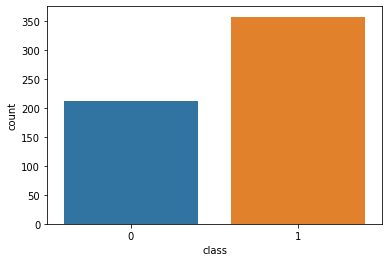

In [14]:
sns.countplot(df['class'], label="Count") # bar graph of Malignant and Benign cancer patients comparison 
df['class'].value_counts()
df.shape

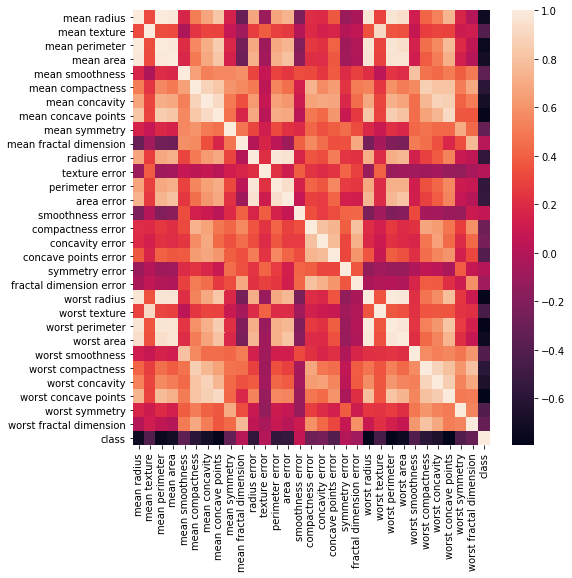

In [15]:
# Correlation Plot
corr = df.corr()
corr.shape
plt.figure(figsize=(8,8))
sns.heatmap(corr)
plt.show()

In [16]:
#Checking for missing values
df.isnull().values.any() #this returns boolean

False

## Splitting The Dataset

In [17]:
# importing train-test split from sklearn
from sklearn.model_selection import train_test_split

In [18]:
# splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y , test_size = 0.1)  # 10% of the data as test data
# test_size --> to specify the percentage of test data needed

In [19]:
#Now,we will see that the target data is uniformly split in train and test by checking each data mean by using mean() attribute
# mean of original data
print(Y.mean())
# mean of train data
print(Y_train.mean())
# mean of test data
print(Y_test.mean())

0.6274165202108963
0.62109375
0.6842105263157895


here the mean shows large variation for the 3 forms of data.
So, we will use the stratify attribute to split the data into equal uniformity and check again the mean for the 3 forms of data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y , test_size = 0.1 , stratify = Y)   
# stratify --> for correct distribution of data as of the original data 

In [21]:
print(Y.mean())
print(Y_train.mean())
print(Y_test.mean())

0.6274165202108963
0.626953125
0.631578947368421


So, now the data is uniformly distributed in train and test for target variable.
and we are ready to train our models


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)
# random_state --> specific split of data. each value of random_state splits the data differently

## Model Building

We will train our model using-
* Logistic Regression
* K-Nearest Neighbours

And then check the accuracy for both the models for training and testing data to give the best model for predicting

**Logistic Regression Model**


In [23]:
# importing Logistic regression from sklearn model
from sklearn.linear_model import LogisticRegression

In [24]:
# loading the logistic regression model to the variable "classifier"
classifier = LogisticRegression() 

In [25]:
#Training the model by fitting the train data into the model using fit attribute
classifier.fit(X_train, Y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluation of the model to check accuracy**

In [27]:
# import accuracy score
from sklearn.metrics import accuracy_score

In [28]:
## Prediction on train data
prediction_on_training_data = classifier.predict(X_train)
accuracy_lr= accuracy_score(Y_train,prediction_on_training_data)

In [29]:
print('accuracy score on training data: ',accuracy_lr)

accuracy score on training data:  0.951171875


In [30]:
## Prediction on test data
prediction_on_test_data = classifier.predict(X_test)
accuracy_LR = accuracy_score(Y_test,prediction_on_test_data)

In [31]:
print('accuracy score on test data: ',accuracy_LR )

accuracy score on test data:  0.9473684210526315


**K-Nearest Neighbors Model**


In [32]:
# importing KNeighbors from sklearn model
from sklearn.neighbors import KNeighborsClassifier

In [33]:
KNN =KNeighborsClassifier(n_neighbors=3) # Initializing the KNearest for k = 3

In [34]:
# Training the model
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Evaluation of the model**

In [35]:
## Prediction on train data
train_data_prediction = KNN.predict(X_train)
accuracy_knn = accuracy_score(Y_train,train_data_prediction)

print('accuracy score on train data : ',accuracy_knn)

accuracy score on train data :  0.955078125


In [36]:
## Prediction on test data
test_data_prediction = KNN.predict(X_test)
accuracy_KNN = accuracy_score(Y_test,test_data_prediction)

print('accuracy score on test data : ',accuracy_KNN)

accuracy score on test data :  0.9122807017543859


**comparing prediction accuracy of both models**

In [37]:
# accuracy_score vary on various factors,this result keeps on changing
results = pd.DataFrame({'Algorithm':['Logic Regression','K-Nearest Neighbors'],
                        'Accuracy':[accuracy_LR,accuracy_KNN]})
print(results)

             Algorithm  Accuracy
0     Logic Regression  0.947368
1  K-Nearest Neighbors  0.912281


as we can see Logic Regression model is more efficient.

So, let's check our model by passing a random value in the model and

**Detect whether the Patient has breast cancer in Benign or Malignant stage**


In [38]:
# taking a random value from the breast cancer dataset 
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input_data to numpy_array to make prediction
input_data_as_numpy_array = np.asarray(input_data) 
print(input_data)

(13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259)


In [39]:
# reshape the array as we are predicting the output for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#prediction
prediction = classifier.predict(input_data_reshaped)
print(prediction) 

[1]


In [40]:
# printing the output

if (prediction[0]==0):
    print('The breast Cancer is Malignant')
else:
    print('The breast cancer is Benign')

The breast cancer is Benign


**So, In this project we have explored a data set of breast cancer patients having Benign and Malignant tumor.
we trained two classification model for breast cancer prediction and by comparing the prediction accuracy of these models, it was found that model trained on logistic regression performed the best in classifying the dataset. also we have checked the model by passing a random value in the logistic regression model to detect whether the patient has breast cancer in Benign or Malignant stage**